# Importing Libraries!

In [116]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Reading dataset taken from Data.gov provided by Indian meteorological Dept.

In [144]:
df=pd.read_excel("cyclone.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [145]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-Sept,Oct-Dec
0,1951,0,0,0,1,0,0,1,0,0,0,1,1,4,0,1,1,2
1,1952,0,0,0,0,1,0,1,0,0,0,2,0,4,0,1,1,2
2,1953,0,0,0,1,0,0,0,1,0,0,0,0,2,0,1,1,0
3,1954,0,0,0,0,0,0,0,0,1,0,0,1,2,0,0,1,1
4,1955,0,0,0,0,1,0,0,0,2,1,2,0,6,0,1,2,3


In [147]:
#droping unnecessary columns!
df=df.drop(columns=['Jan-Feb','Mar-May','June-Sept','Oct-Dec'],axis=1)

In [148]:
df.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1951,0,0,0,1,0,0,1,0,0,0,1,1,4
1,1952,0,0,0,0,1,0,1,0,0,0,2,0,4
2,1953,0,0,0,1,0,0,0,1,0,0,0,0,2
3,1954,0,0,0,0,0,0,0,0,1,0,0,1,2
4,1955,0,0,0,0,1,0,0,0,2,1,2,0,6


# Exploring Dataset!

In [149]:
sns.set_style("darkgrid")

In [150]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1981.500000,0.048387,0.016129,0.016129,0.161290,0.790323,0.33871,0.096774,0.129032,0.403226,0.870968,1.209677,0.500000,4.580645
std,18.041619,0.216335,0.127000,0.127000,0.370801,0.749581,0.57098,0.298064,0.337972,0.664305,0.819513,0.925718,0.620682,1.779191
min,1951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1966.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1981.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000
75%,1996.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,6.000000
max,2012.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.00000,1.000000,1.000000,2.000000,3.000000,4.000000,3.000000,9.000000


# Exploring Data using Seaborn Visualization !

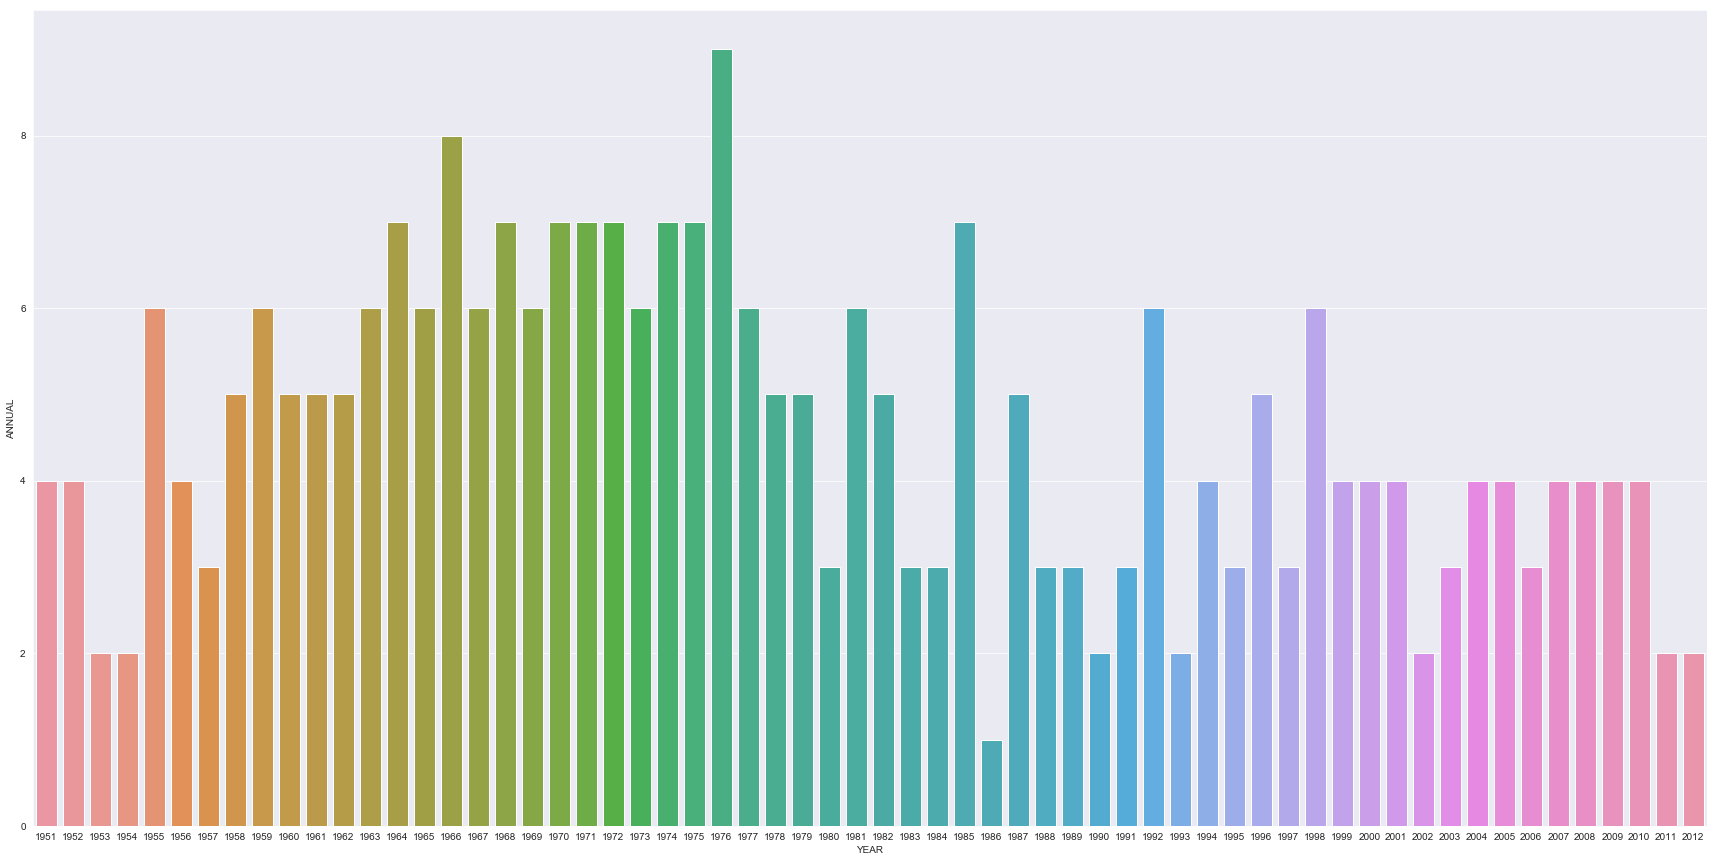

In [151]:
#plotting total number of cyclonic occurrences vs year!
plt.subplots(figsize=(30,15))
sns.barplot(x="YEAR",y='ANNUAL',data=df)

In [152]:
#Finding the year with max. cyclone occurrences!
df[df["ANNUAL"]==df["ANNUAL"].max()]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
25,1976,0,0,0,0,2,0,0,0,2,2,2,1,9


In [153]:
#Finding the year with least cyclone occurrences!
df[df["ANNUAL"]==df["ANNUAL"].min()]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
35,1986,0,0,0,0,0,0,0,0,0,0,1,0,1


In [155]:
#Trying to get an aggregate of number of cyclones monthly !
aggr=[]

In [156]:
#extracting useful columns from the dataframe!
cf=df.iloc[:,1:-1]
g=cf.columns

In [157]:
for month in g:
    aggr.append(cf[month].sum())

In [158]:
aggr

[3, 1, 1, 10, 49, 21, 6, 8, 25, 54, 75, 31]

'\n   ---> It is clear that Cyclone is most likely to strike on winter months or the last quarter of the year i.e Sept-Dec!\n   ---> May also shows high chances of cyclones!\n   ---> It is least likely to get a cyclone in the first quarter of the year i.e Jan-April\n'

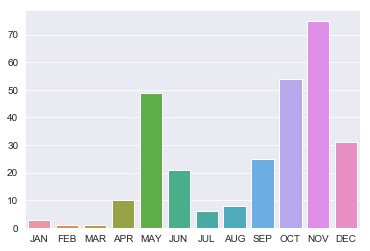

In [159]:
sns.barplot(x=g,y=aggr)
'''
   ---> It is clear that Cyclone is most likely to strike on winter months or the last quarter of the year i.e Sept-Dec!
   ---> May also shows high chances of cyclones!
   ---> It is least likely to get a cyclone in the first quarter of the year i.e Jan-April
'''

In [160]:
#To check number of years we have in the dataset!
df["YEAR"].count()

62

In [161]:
#Trying to count the number of occurrences of cyclone for a period of 10 years or a decade!
decade=[]
occur=df['ANNUAL']
count=0
val=0
for i in occur:
    val=val+i
    count=count+1
    if count==10:
        decade.append(val)
        val=0
        count=0

In [162]:
decade

[41, 63, 62, 38, 40, 36]

In [163]:
years=['1951-61','1961-71','1971-81','1981-91','1991-01','2001-11']

'\n   ---> Decade 1961-1971 and 1971-1981 saw most of the cyclones!\n'

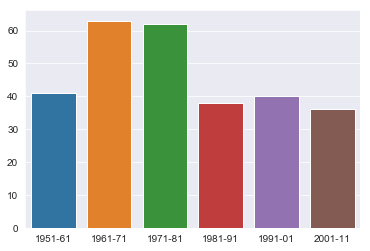

In [164]:
sns.barplot(x=years,y=decade)
'''
   ---> Decade 1961-1971 and 1971-1981 saw most of the cyclones!
'''

In [165]:
'''
  <!-------------------------------- The End -------------------------------------------------------->
'''

'\n  <!-------------------------------- The End -------------------------------------------------------->\n'